<a href="https://colab.research.google.com/github/Phattharyu/CPE_232-Final_project-GoldPrediction-/blob/main/File_Formatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing pandas-ta**

In [ ]:
!pip install numpy==1.24.4
!pip install pandas-ta==0.3.14b0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
^C


# **Import Library & Data from yahoo finance**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf
import pandas_datareader as pdr

from datetime import datetime
end = datetime.now()
end = datetime(end.year, end.month,end.day-1)
start = datetime(end.year -20, end.month,end.day)

df = yf.download('GC=F', start,end)

ModuleNotFoundError: No module named 'pandas_ta'

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2005-04-21,433.000000,435.000000,432.299988,434.100006,52
2005-04-22,434.299988,435.799988,433.500000,433.500000,88
2005-04-25,434.600006,434.399994,432.700012,432.700012,19
2005-04-26,437.899994,438.200012,435.899994,438.000000,169
2005-04-27,433.000000,437.000000,433.600006,436.399994,19
...,...,...,...,...,...
2025-04-11,3222.199951,3235.000000,3182.100098,3182.100098,862
2025-04-14,3204.800049,3228.800049,3194.500000,3215.500000,263


# **Inspect data**

In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
count,5026.000000,5026.000000,5026.000000,5026.000000,5026.000000
mean,1375.475387,1382.573339,1368.145245,1375.476562,4937.734978
std,503.386875,505.940723,500.542920,503.083538,26574.015745
min,415.299988,416.500000,413.200012,415.799988,0.000000
25%,1107.699951,1117.649994,1102.224976,1109.724976,36.000000
50%,1303.450012,1309.149963,1296.599976,1303.350037,138.000000
75%,1727.199951,1735.875000,1719.000000,1727.375031,479.250000
max,3326.600098,3345.000000,3287.800049,3345.000000,386334.000000


In [ ]:
df = df.droplevel('Ticker', axis=1)
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2005-04-21,433.000000,435.000000,432.299988,434.100006,52
2005-04-22,434.299988,435.799988,433.500000,433.500000,88
2005-04-25,434.600006,434.399994,432.700012,432.700012,19
2005-04-26,437.899994,438.200012,435.899994,438.000000,169
2005-04-27,433.000000,437.000000,433.600006,436.399994,19
...,...,...,...,...,...
2025-04-11,3222.199951,3235.000000,3182.100098,3182.100098,862
2025-04-14,3204.800049,3228.800049,3194.500000,3215.500000,263
2025-04-15,3218.699951,3218.699951,3214.000000,3216.000000,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5026 entries, 2005-04-21 to 2025-04-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5026 non-null   float64
 1   High    5026 non-null   float64
 2   Low     5026 non-null   float64
 3   Open    5026 non-null   float64
 4   Volume  5026 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.6 KB


# **Feature Engineering**

In [ ]:
import pandas_ta as ta
df['RSI'] = df.ta.rsi(close='close', length=14)
df

Price,Close,High,Low,Open,Volume,RSI
Date,,,,,,
2005-04-21,433.000000,435.000000,432.299988,434.100006,52,NaN
2005-04-22,434.299988,435.799988,433.500000,433.500000,88,NaN
2005-04-25,434.600006,434.399994,432.700012,432.700012,19,NaN
2005-04-26,437.899994,438.200012,435.899994,438.000000,169,NaN
2005-04-27,433.000000,437.000000,433.600006,436.399994,19,NaN
...,...,...,...,...,...,...
2025-04-11,3222.199951,3235.000000,3182.100098,3182.100098,862,69.096304
2025-04-14,3204.800049,3228.800049,3194.500000,3215.500000,263,66.775321
2025-04-15,3218.699951,3218.699951,3214.000000,3216.000000,390,67.708479


In [ ]:
df['SMA10'] = ta.sma(df["Close"], length=10)
df

Price,Close,High,Low,Open,Volume,RSI,SMA10
Date,,,,,,,
2005-04-21,433.000000,435.000000,432.299988,434.100006,52,NaN,NaN
2005-04-22,434.299988,435.799988,433.500000,433.500000,88,NaN,NaN
2005-04-25,434.600006,434.399994,432.700012,432.700012,19,NaN,NaN
2005-04-26,437.899994,438.200012,435.899994,438.000000,169,NaN,NaN
2005-04-27,433.000000,437.000000,433.600006,436.399994,19,NaN,NaN
...,...,...,...,...,...,...,...
2025-04-11,3222.199951,3235.000000,3182.100098,3182.100098,862,69.096304,3084.419971
2025-04-14,3204.800049,3228.800049,3194.500000,3215.500000,263,66.775321,3092.619971
2025-04-15,3218.699951,3218.699951,3214.000000,3216.000000,390,67.708479,3102.599976


In [ ]:
df['SMA20'] = ta.sma(df["Close"], length=20)
df

Price,Close,High,Low,Open,Volume,RSI,SMA10,SMA20
Date,,,,,,,,
2005-04-21,433.000000,435.000000,432.299988,434.100006,52,NaN,NaN,NaN
2005-04-22,434.299988,435.799988,433.500000,433.500000,88,NaN,NaN,NaN
2005-04-25,434.600006,434.399994,432.700012,432.700012,19,NaN,NaN,NaN
2005-04-26,437.899994,438.200012,435.899994,438.000000,169,NaN,NaN,NaN
2005-04-27,433.000000,437.000000,433.600006,436.399994,19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-04-11,3222.199951,3235.000000,3182.100098,3182.100098,862,69.096304,3084.419971,3058.889978
2025-04-14,3204.800049,3228.800049,3194.500000,3215.500000,263,66.775321,3092.619971,3069.129980
2025-04-15,3218.699951,3218.699951,3214.000000,3216.000000,390,67.708479,3102.599976,3078.309973


In [ ]:
#We need to drop some data since we computed
df = df.dropna()
df

Price,Close,High,Low,Open,Volume,RSI,SMA10,SMA20
Date,,,,,,,,
2005-05-19,420.500000,421.200012,421.200012,421.200012,0,32.416601,422.880005,427.580002
2005-05-20,417.399994,416.500000,416.500000,420.200012,4,27.835237,422.010004,426.800002
2005-05-23,416.600006,416.600006,416.600006,416.600006,4,26.783283,421.050003,425.915002
2005-05-24,417.500000,417.500000,417.500000,417.500000,4,29.988885,420.080002,425.060002
2005-05-25,418.799988,418.799988,418.799988,418.799988,4,34.453012,419.239999,424.105002
...,...,...,...,...,...,...,...,...
2025-04-11,3222.199951,3235.000000,3182.100098,3182.100098,862,69.096304,3084.419971,3058.889978
2025-04-14,3204.800049,3228.800049,3194.500000,3215.500000,263,66.775321,3092.619971,3069.129980
2025-04-15,3218.699951,3218.699951,3214.000000,3216.000000,390,67.708479,3102.599976,3078.309973


In [ ]:
# saving the dataframe
df.to_csv('Gold_dataset.csv')

In [ ]:
!gdown 1-l6pzhzr9H_KMf3wv5SKjK_SVccQerwK

Downloading...
From: https://drive.google.com/uc?id=1-l6pzhzr9H_KMf3wv5SKjK_SVccQerwK
To: /content/Gold_dataset.csv
100% 647k/647k [00:00<00:00, 8.60MB/s]


In [ ]:
df = pd.read_csv('Gold_dataset.csv')
df

,Date,Close,High,Low,Open,Volume,RSI,SMA10,SMA20
0,2005-05-19,420.500000,421.200012,421.200012,421.200012,0,32.416601,422.880005,427.580002
1,2005-05-20,417.399994,416.500000,416.500000,420.200012,4,27.835237,422.010004,426.800002
2,2005-05-23,416.600006,416.600006,416.600006,416.600006,4,26.783283,421.050003,425.915002
3,2005-05-24,417.500000,417.500000,417.500000,417.500000,4,29.988885,420.080002,425.060002
4,2005-05-25,418.799988,418.799988,418.799988,418.799988,4,34.453012,419.239999,424.105002
...,...,...,...,...,...,...,...,...,...
5002,2025-04-11,3222.199951,3235.000000,3182.100098,3182.100098,862,69.096304,3084.419971,3058.889978
5003,2025-04-14,3204.800049,3228.800049,3194.500000,3215.500000,263,66.775321,3092.619971,3069.129980
5004,2025-04-15,3218.699951,3218.699951,3214.000000,3216.000000,390,67.708479,3102.599976,3078.309973
5005,2025-04-16,3326.600098,3334.899902,3238.300049,3238.300049,1874,73.848686,3121.269995,3092.844983


# **MinMaxScaler**

# **Data Processing**

In [ ]:
train_size = round(len(df)*0.8)
test_size = len(df)-train_size
print('Train:',train_size,'Test:',test_size)

Train: 4006 Test: 1001


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.Close.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

test_data = df.Close[train_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
train_data_sma = df['SMA10'][:train_size]
train_data_sma = scaler.transform(train_data_sma.values.reshape(-1,1))

In [ ]:
test_data_sma = df['SMA10'][train_size:]
test_data_sma = scaler.transform(test_data_sma.values.reshape(-1,1))

In [ ]:
x= train_data[0:5]
print(x)
xx = train_data_sma[10:13]
x = np.append(x, xx)
x

[[0.00178615]
 [0.00072133]
 [0.00044654]
 [0.00075568]
 [0.00120221]]


array([0.00178615, 0.00072133, 0.00044654, 0.00075568, 0.00120221,
       0.00113695, 0.00144953, 0.00173119])

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_sma[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(len(df)-train_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_sma[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4001, 10, 1), (4001, 1), (996, 10, 1), (996, 1))

In [ ]:
!pip install --upgrade jax jaxlib
!pip install --upgrade numpy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((10,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

/usr/local/lib/python3.11/dist-packages/numpy/_typing/_scalars.py:12: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  _BoolLike_co: TypeAlias = bool | np.bool


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
cp1 = ModelCheckpoint('model1/best1.keras',save_best_only = True)
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])

In [ ]:
model1.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 10,callbacks=[cp1])

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0484 - root_mean_squared_error: 0.2172 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1241
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0801
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8094e-04 - root_mean_squared_error: 0.0195 - val_loss: 2.6167e-04 - val_root_mean_squared_error: 0.0162
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2996e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.6837e-04 - val_root_mean_squared_error: 0.0130
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.0252e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.7005e-04 - val_root_mean_squared_error: 0.0130
Epoch 7/10
126/126 ━━━━━━━━

In [ ]:
result = model1.evaluate(x_test, y_test)
y_pred = model1.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2216e-04 - root_mean_squared_error: 0.0110
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [ ]:
#OLD RESULT
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: [0.00030414509819820523, 0.01743975654244423]
Test MAPE: 0.0180525658741178
Test Accuracy: 0.9819474341258823


In [ ]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: [0.00019134765898343176, 0.013832846656441689]
Test MAPE: 0.017643378266306582
Test Accuracy: 0.9823566217336934


In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

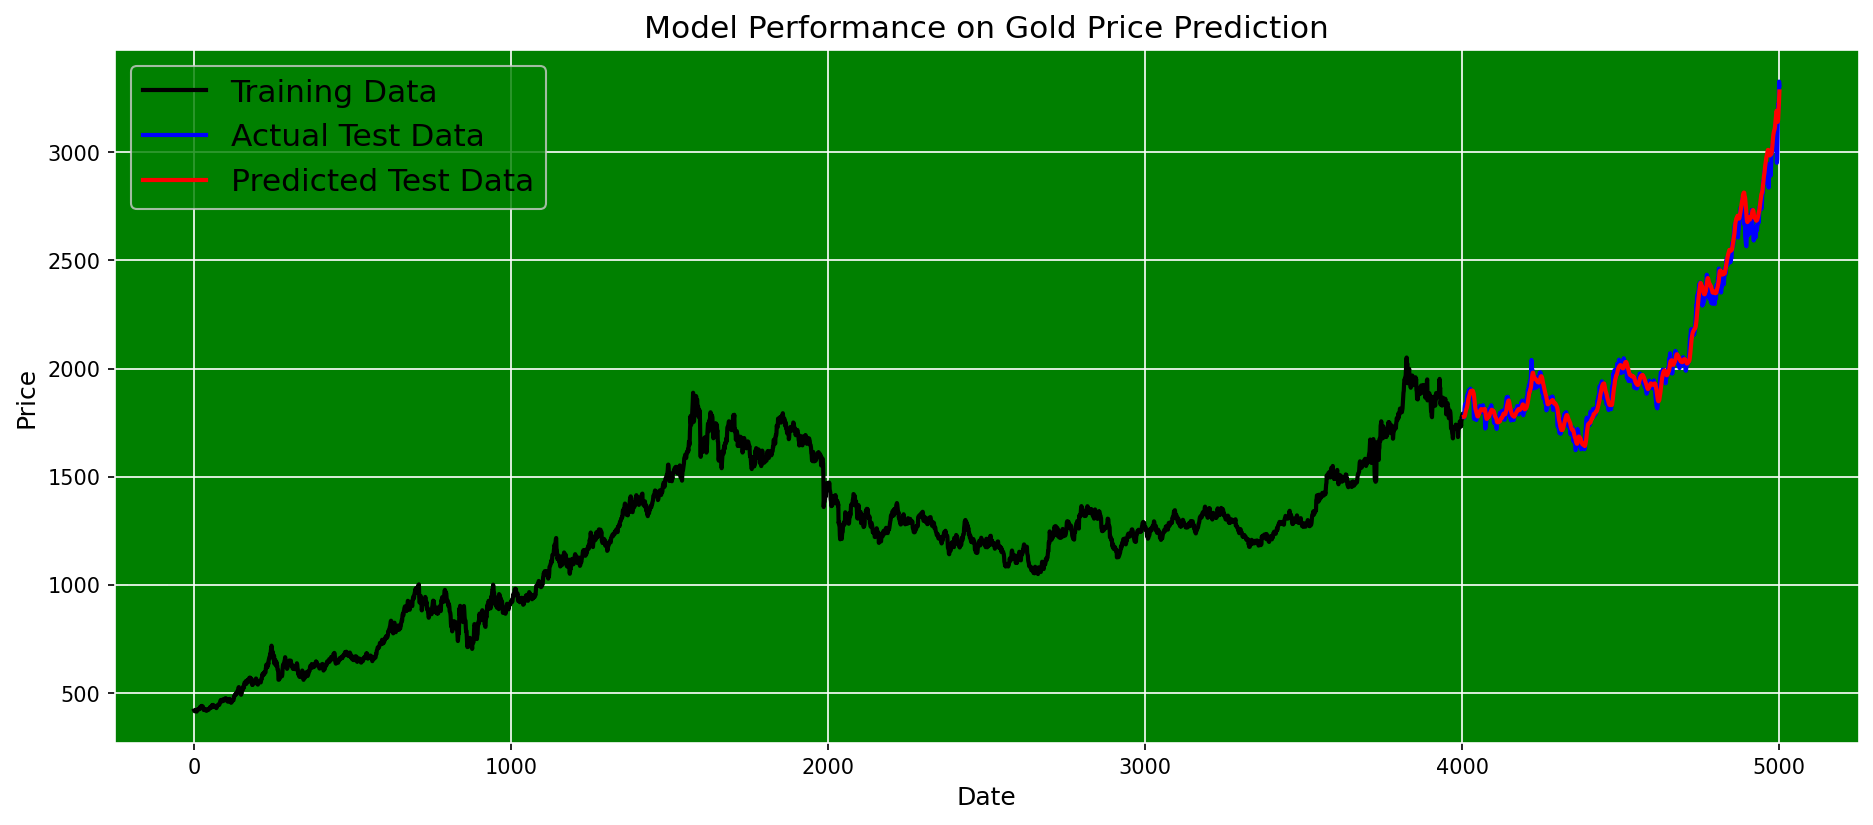

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
plt.plot(df.index[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[-test_size:][:len(y_test_true)], y_test_true, color='blue', lw=2) # This line was changed
plt.plot(df.index[-test_size:][:len(y_test_pred)], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
df.index[-test_size:len(y_test_true)]

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
df.index[-test_size:][:len(y_test_pred)]

DatetimeIndex(['2021-01-29', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11',
               ...
               '2024-12-30', '2024-12-31', '2025-01-02', '2025-01-03',
               '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09',
               '2025-01-10', '2025-01-13'],
              dtype='datetime64[ns]', name='Date', length=995, freq=None)

In [ ]:
y_test_pred.shape

(995, 1)

In [ ]:
y_test_true.shape

(995, 1)